In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/drugsComTrain_raw_sentiment.csv', encoding= 'unicode_escape')

In [ ]:
dataset.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive


In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-4z184jq_
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-4z184jq_
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=3d643adff5a4d284cb569877add5792495364445e23cd14696fd49cbc5504de5
  Stored in directory: /tmp/pip-ephem-wheel-cache-cma8a5ji/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
dataset['review'] = dataset['review'].apply(lambda x: get_clean(x))

In [ ]:
#import nltk
#from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#word_tokenize(dataset['review'])

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
#from keras.layers.embeddings import Embedding
#import tensorflow as tf
#tf.keras.preprocessing.text.Tokenizer(
 #   num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
  #  split=' ', char_level=False, oov_token=None, document_count=0, **kwargs
#)

In [ ]:
# Loading Libraries
#from nltk.tokenize import PunktSentenceTokenizer
#from nltk.corpus import webtext
#dataset['review'] = PunktSentenceTokenizer(dataset['review'].all())
#sents_1 = sent_tokenizer.tokenize(dataset['review'].all())

#print(sents_1[0])
#print("\n"sents_1[678])

In [ ]:
dataset['review'].head()

0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
2    i used to take another oral contraceptive whic...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
Name: review, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5), analyzer='word')

In [ ]:
X = tfidf.fit_transform(dataset['review'])
Y = dataset['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 24)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(X_train, Y_train)
rf_pred = randomf.predict(X_test)
rf_acc=accuracy_score(Y_test, rf_pred)
print(rf_acc)

0.8364538127712338


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

    Negative       0.92      0.68      0.78      7173
     Neutral       0.99      0.50      0.67      5650
    Positive       0.80      0.99      0.89     19437

    accuracy                           0.84     32260
   macro avg       0.91      0.72      0.78     32260
weighted avg       0.86      0.84      0.82     32260



Text(0.5, 145.31999999999996, 'Predicted')

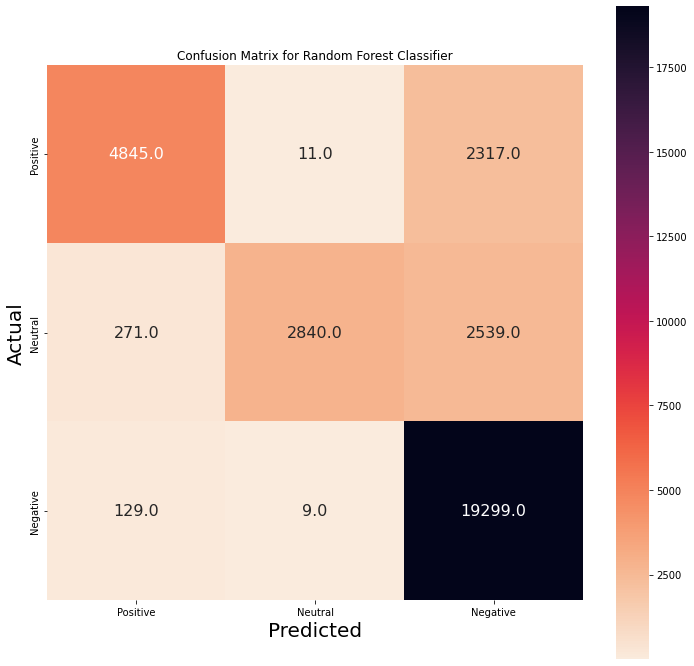

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = rf_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Random Forest Classifier")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)